## Introduction
Recent studies have shown a staggering decline in bird populations across North America since 1970 ([Nearly 3 Billion Birds Gone](https://www.birds.cornell.edu/home/bring-birds-back/#:~:text=NARRATOR%3A%20Birds%20are%20losing%20the,toxic%20pesticides%20and%20insect%20declines.)) Worldwide, we are seeing a similarly dramatic loss of biodiversity. These changes are dire consequences of a world pushed to the brink by human activity. It is of utmost importance that we understand, address, and potentially alleviate these harmful changes.

Birds are essential to our ecosystems and our wellbeing. They play critical roles in [pest control, pollintation, seed dispersal,](https://www.birdlife.org/news/2019/01/04/why-we-need-birds-far-more-than-they-need-us/) and overall maintaining the balance of nature. Their presence is an indicator of a healthy environment, and decline in bird populations signifies broader environmental issues that also impact other wildlife and human health. 

More than ever, data science is an integral part of developing such understanding and promoting positive change in the world. The subject of bird loss - along with a wider range of environmental/conservation subjects - will benefit greatly from the application of quality data science. This project is therefore a pertinent exercise in using data science for positive change, as well as a fantastic example of the power of data science in the current day.

In this report, we present the complete data science pipeline, incorporating the following steps:

1. Data Collection
2. Data Processing
3. Exploratory Data Analysis and Visualization
4. Hypothesis Testing and Machine Learning
5. Insight and Policy Decision

The issue of bird population decline is a complex and nuanced one, but we hope to provide the reader with an improved understanding of some critical factors through our analysis, such as habitat loss, urbanization/human activity, commercial building density, tree cover loss, and temperature increase due to climate change. These factors barely scratch the surface of the complex ways ecosystems and biodiversity respond to widespread change, but analyzing them in connection with bird population decline will hopefully prompt us to consider the environmental impacts of what we do. On a local level, a national level, and an international level, we can implement policies that curtail this dramatic bird loss; to do so, we must first understand what the data tells us.

This project was done using [IPython](https://ipython.org/) and [Jupyter Notebooks](https://jupyter.org/), which provide easy and interactive coding environments for Python.

<div style="text-align: center;">
    <img src="../SharedData/TELI.JPG" alt="Description" style="max-width: 33%; height: auto;">
</div>

In [80]:
import pandas as pd
import os
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_columns', None)

current_dir = os.getcwd()

In [81]:
def plot_map(column_to_plot, dataset, title, cmap="inferno"):
    # Plot the map
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    dataset.plot(column=column_to_plot, cmap=cmap, linewidth=0.01, ax=ax, edgecolor='0.8', legend=True)
    plt.title(title)
    plt.show()

In [82]:
climate = pd.read_csv(os.path.join(current_dir, '..', 'SharedData', 'Climate_Data_with_FIPS.csv'), dtype={'FIPS': str})

climate.head()

,FIPS,State_Code,County_FIPS,Year,Avg_Temp,Max_Temp,Min_Temp,Total_Precip
0,1001,1,1,1970,62.666667,92.1,28.1,50.06
1,1001,1,1,1971,63.241667,90.1,33.8,64.32
2,1001,1,1,1972,63.708333,91.0,37.6,57.44
3,1001,1,1,1973,63.583333,90.7,32.8,60.80
4,1001,1,1,1974,63.808333,90.3,35.4,59.63


In [83]:
master = pd.read_csv(os.path.join(current_dir, '..', 'SharedData', 'master_dataset.csv'), dtype={'FIPS': str})

master.sort_values(by= ['FIPS', 'Year'], inplace= True)

master.head()

,RouteDataID,StateNum,Route,Year,SpeciesTotal_MS,StateName,CountyName,StateFIPS,CountyFIPS,FIPS,Car_Total,Avg_Temp,Max_Temp,Min_Temp,Total_Precip,forest_extent_2000_ha,Forest_HA_Loss,Forest_Percent_Lost,URBAN_RURAL_SCORE,METRO_LEVEL,total_bldg_area,bldg_area_per_sq_mile
2248,6170867,2,25,1970,654.0,Alabama,Autauga,1,1,01001,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,3,Medium metropolitan,6993000.0,11764.013189
1414,6169552,2,25,1971,561.0,Alabama,Autauga,1,1,01001,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,3,Medium metropolitan,6993000.0,11764.013189
4884,6173962,2,25,1972,756.0,Alabama,Autauga,1,1,01001,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,3,Medium metropolitan,6993000.0,11764.013189
7022,6176714,2,25,1973,1464.0,Alabama,Autauga,1,1,01001,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,3,Medium metropolitan,6993000.0,11764.013189
8265,6178298,2,25,1976,823.0,Alabama,Autauga,1,1,01001,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,3,Medium metropolitan,6993000.0,11764.013189


In [84]:
# rows_with_nan = master[master.isna().any(axis=1)].copy()
# print(rows_with_nan)

In [85]:
# Generalized function for plotting features against each other
def plot_dependent_vs_independent(df, column_independent, column_dependent, regression=False):
    # Drop rows with NaN values in the specified columns
    df_cleaned = df.dropna(subset=[column_independent, column_dependent])
    
    # Extract the specified columns from the cleaned DataFrame
    x_values = df_cleaned[column_independent]
    y_values = df_cleaned[column_dependent]
    
    # Plot the scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, marker='o')
    plt.xlabel(column_independent)
    plt.ylabel(column_dependent)
    plt.title(f'{column_dependent} vs. {column_independent}')
    
    # Add regression line if desired
    if regression:
        X = x_values.values.reshape(-1, 1)
        y = y_values.values
        model = LinearRegression()
        model.fit(X, y)
        plt.plot(X, model.predict(X), color='red')
        
        slope = model.coef_[0]
        intercept = model.intercept_
        print(f"Slope: {slope}")
        print(f"Intercept: {intercept}")
    
    plt.grid(True)
    plt.show()

Slope: 0.04583524375254168
Intercept: -37.223722806730585


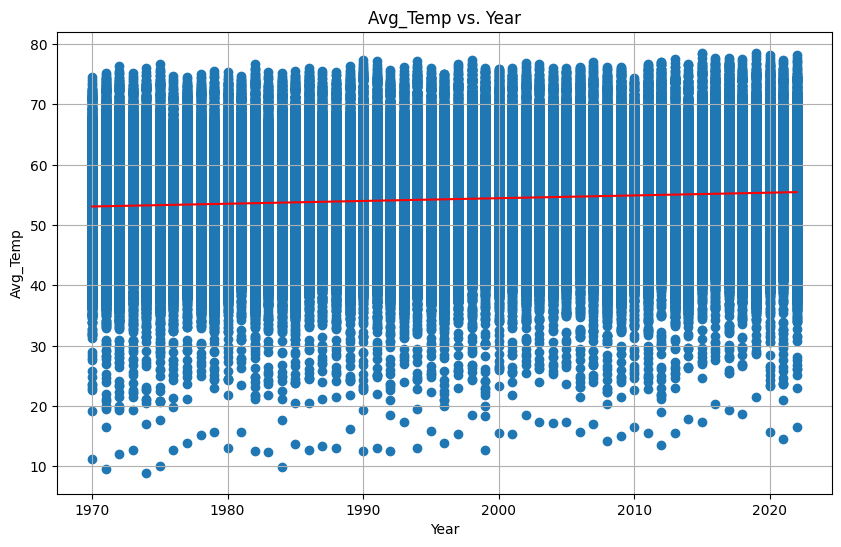

In [86]:
# Plotting Avg_Temp across Time
plot_dependent_vs_independent(climate, 'Year', 'Avg_Temp', True)

Slope: 0.021450148122075696
Intercept: 44.687557746307554


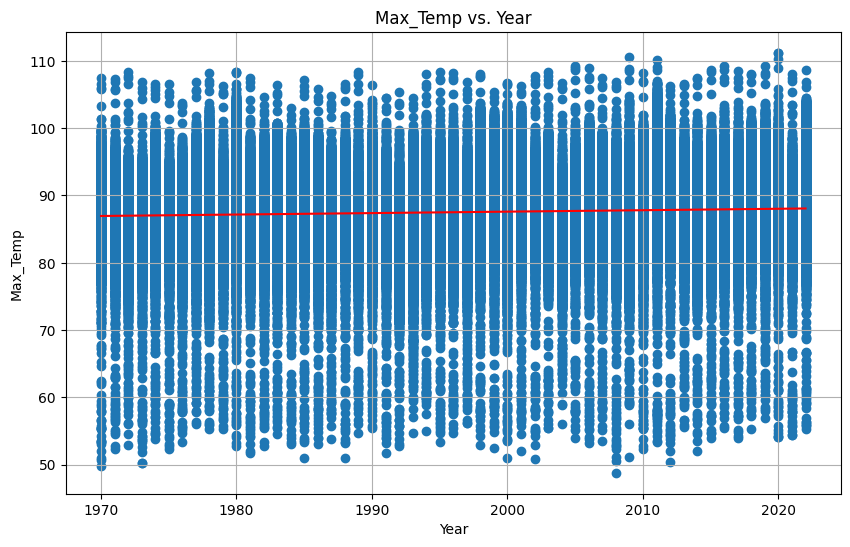

In [87]:
# Plotting Max_Temp across Time
plot_dependent_vs_independent(climate, 'Year', 'Max_Temp', True)

Slope: 0.08226920221257544
Intercept: -144.1698583481018


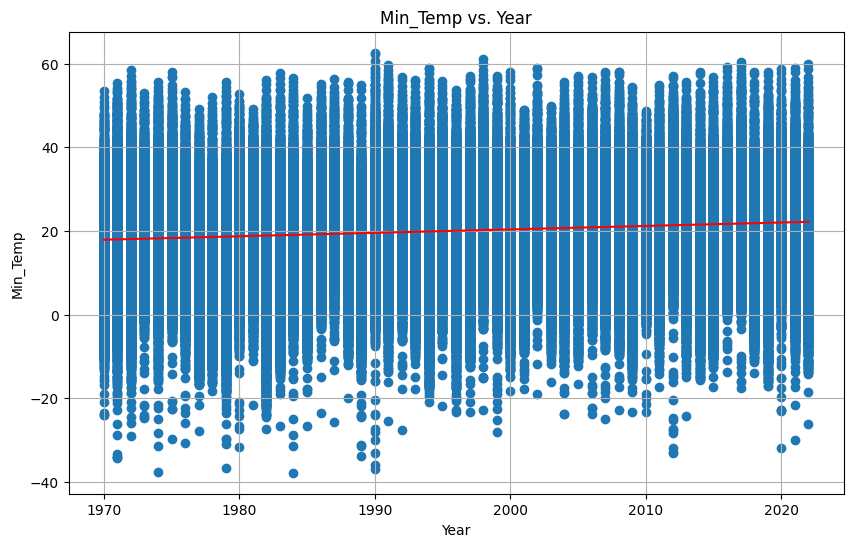

In [88]:
# Plotting Max_Temp across Time
plot_dependent_vs_independent(climate, 'Year', 'Min_Temp', True)

From the looks of things, while our model predicts a general increase in temperature throughout each county, the spread of our data points is so far out, that we can't really say that this is a strong correlation. What if we visualize this data geographically?

In [89]:
counties = gpd.read_file(os.path.join(current_dir, '..', 'SharedData', 'Counties2', 'us_county.shp')).rename(columns={"GEOID": "FIPS"})

counties["FIPS"] = counties["FIPS"].astype(str)

merged = counties.merge(climate, how="inner", left_on="FIPS", right_on="FIPS")

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,FIPS,NAME,LSAD,ALAND,AWATER,id,geometry,State_Code,County_FIPS,Year,Avg_Temp,Max_Temp,Min_Temp,Total_Precip
0,21,007,00516850,0500000US21007,21007,Ballard,06,639387454.0,69473325.0,1,"POLYGON ((959182.740 -821711.187, 959268.612 -...",15,7,1970,56.375000,88.2,16.5,48.36
1,21,007,00516850,0500000US21007,21007,Ballard,06,639387454.0,69473325.0,1,"POLYGON ((959182.740 -821711.187, 959268.612 -...",15,7,1971,57.150000,88.6,22.8,41.86
2,21,007,00516850,0500000US21007,21007,Ballard,06,639387454.0,69473325.0,1,"POLYGON ((959182.740 -821711.187, 959268.612 -...",15,7,1972,56.308333,86.1,24.5,58.77
3,21,007,00516850,0500000US21007,21007,Ballard,06,639387454.0,69473325.0,1,"POLYGON ((959182.740 -821711.187, 959268.612 -...",15,7,1973,57.825000,89.0,25.8,62.44
4,21,007,00516850,0500000US21007,21007,Ballard,06,639387454.0,69473325.0,1,"POLYGON ((959182.740 -821711.187, 959268.612 -...",15,7,1974,56.891667,90.3,29.0,40.95


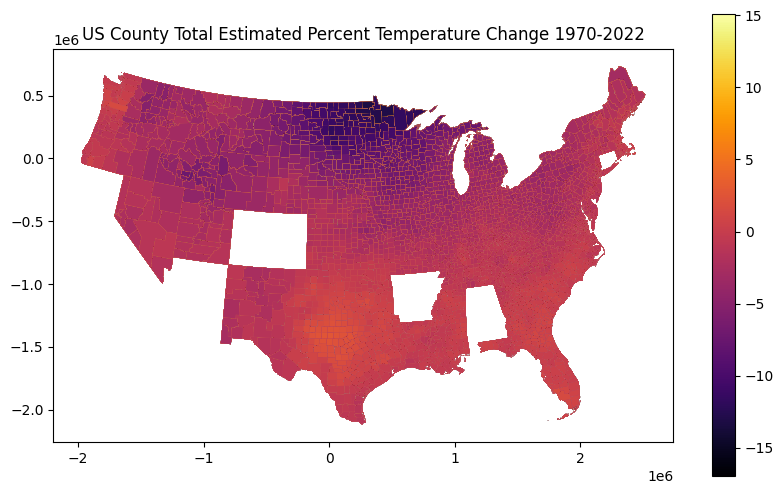

In [90]:
merged['temp_change_percent'] = merged.groupby('FIPS')['Avg_Temp'].pct_change() * 100

plot_map("temp_change_percent", merged, "US County Total Estimated Percent Temperature Change 1970-2022")

Looking at this map alone. This reinforces our case where it's difficult to determine the temperature based on year since while in some areas the average temperature is increasig, there are other areas where the average temperature is surprisingly decreasing. Our graph does look a little spotty with some missing states, but that can be attributed to how our data was collected to begin with. Let's look at some other data, where we climate factors to each other.

In [93]:
merged = counties.merge(master, how="inner", left_on="FIPS", right_on="FIPS")

counties["FIPS"] = counties["FIPS"].astype(str)

Slope: 1.045740693211715
Intercept: -37.241034254499716


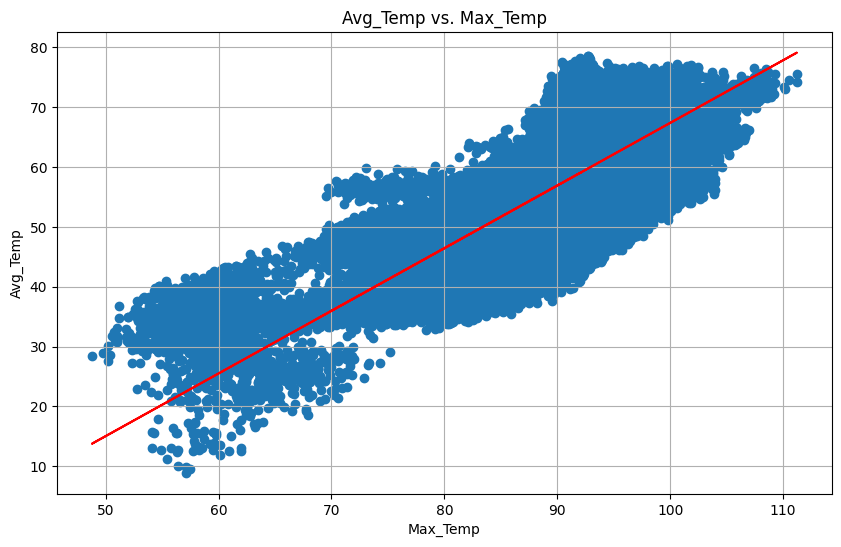

In [94]:
plot_dependent_vs_independent(climate, 'Max_Temp', 'Avg_Temp', True)

Slope: 0.6209383495284228
Intercept: 41.820148750521696


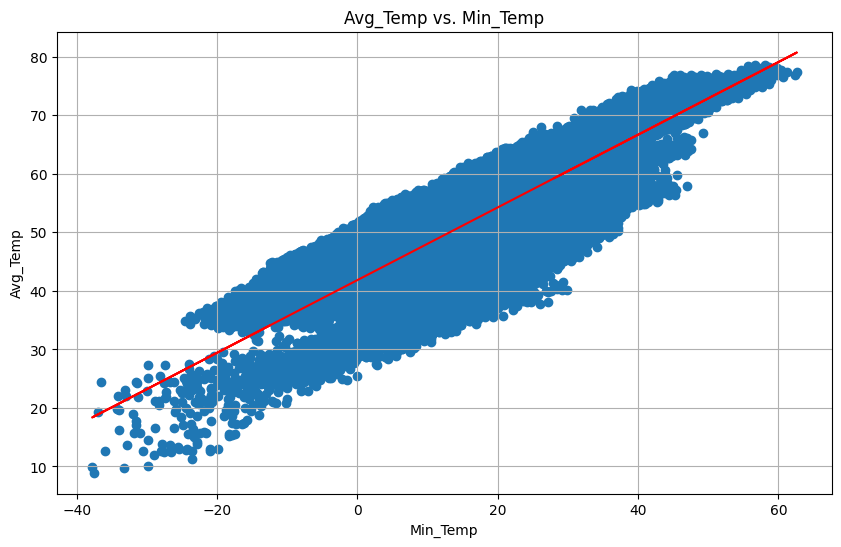

In [96]:
plot_dependent_vs_independent(climate, 'Min_Temp', 'Avg_Temp', True)

Interesting. We it seems like our regression like is more set in stone when comparing temperatures to each other. However, there's still some spread. Let's keep these metrics in mind when developing our model.